In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
expressed_gene_tpm_threshold = 100
minimum_samples_threshold_long = 20
minimum_samples_threshold_circadian = 8

In [4]:
transcriptome = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/plate1_4_tpm_normalized.csv",
    index_col=0,
)
rows_to_drop_expression_data = [
    "A2450525897_n01_undetermined",
    "A2449446903_n01_undetermined",
    "B250508004_n01_undetermined",
    "B2449500127_n01_undetermined",
]
transcriptome = transcriptome.drop(index=rows_to_drop_expression_data)
transcriptome = transcriptome.sort_index()

metadata = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/Plates_1_to_4_metadata_merged_luke.csv",
    index_col=0,
)
metadata = metadata.drop(
    columns=[
        "arb.sort",
        "sample-id",
        "Ambiguous Unstranded",
        "Ambiguous Forward",
        "Multimapping",
        "Unmapped Over Mapped",
    ]
)
metadata["Date and Time"] = metadata["date"] + " " + metadata["time"]
luke_time_data_format = "%-m/%-d/%y %-H:%-M"
metadata["Date and Time"] = pd.to_datetime(
    metadata["Date and Time"], format=luke_time_data_format
)

unusable_samples = [
    "A2450525897_n01_LICRNA01_A06",
    "A2450525897_n01_LICRNA01_A08",
    "A2450525897_n01_LICRNA01_C11",
    "A2450525897_n01_LICRNA01_D11",
    "A2450525897_n01_LICRNA01_D12",
    "A2449446903_n01_LICRNA02_F01",
    "B2449500127_n01_LICRNA04_A04",
    "B2449500127_n01_LICRNA04_A06",
    "B2449500127_n01_LICRNA04_A07",
]
borderline_unusable = [
    "A2450525897_n01_LICRNA01_F03",
    "A2450525897_n01_LICRNA01_G07",
    "A2449446903_n01_LICRNA02_A04",
    "A2449446903_n01_LICRNA02_H10",
    "B2449500127_n01_LICRNA04_H02",
    "B2449500127_n01_LICRNA04_H11",
]
all_unsable = borderline_unusable + unusable_samples

trimmed_transcriptome = transcriptome.drop(index=all_unsable)
trimmed_metadata = metadata.drop(index=all_unsable)
trimmed_metadata = trimmed_metadata.sort_index()
trimmed_transcriptome = trimmed_transcriptome.dropna(how="all", axis=0)
trimmed_transcriptome = trimmed_transcriptome.dropna(how="all", axis=1)

In [5]:
trimmed_transcriptome = trimmed_transcriptome.loc[
    :, trimmed_transcriptome.sum() > expressed_gene_tpm_threshold
]

trimmed_transcriptome

,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01046,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,...,ArthCr091,ArthCr090,ArthCr089,ArthCt114,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp083,ArthCp085
A2449446903_n01_LICRNA02_A01,0.382839,11.929183,3.731527,3.602189,0.0,31.063543,3.966935,1.411759,1.457120,42.945840,...,69.429954,62.741033,199.389218,0.000000,17.950907,44.209074,0.0,0.000000,0.000000,6.266498
A2449446903_n01_LICRNA02_A02,0.000000,5.826682,1.501594,3.439569,0.0,22.712417,18.186693,1.249825,9.110504,39.905696,...,2.364080,4.165830,69.172057,19.592718,1.986484,9.688606,0.0,5.501032,0.519342,3.467317
A2449446903_n01_LICRNA02_A03,1.021565,7.683520,0.301733,2.700528,0.0,42.431625,12.937632,1.412672,6.318269,46.990547,...,7.125626,50.225286,122.221814,0.000000,7.983340,16.384320,0.0,7.983340,0.166972,0.000000
A2449446903_n01_LICRNA02_A05,0.732717,3.149144,1.947758,3.742586,0.0,26.541337,23.861601,6.417176,12.549534,61.319447,...,0.000000,6.004011,73.945487,42.357065,17.178143,17.005325,0.0,0.000000,0.628742,0.000000
A2449446903_n01_LICRNA02_A06,1.614233,1.238895,6.130092,4.215597,0.0,19.379509,5.006570,1.275568,13.823806,38.392286,...,28.953284,41.571544,302.404404,85.317440,16.219201,43.599301,0.0,0.000000,1.074213,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_H08,0.074367,4.474710,1.383813,2.059206,0.0,27.907884,11.118408,0.959827,8.349903,46.544681,...,0.000000,19.500054,33.460202,8.598055,3.486989,4.209645,0.0,1.072920,0.948096,0.760798
B250508004_n01_LICRNA03_H09,2.232353,6.249002,1.873955,3.869254,0.0,40.686812,7.391606,2.003849,9.502699,49.843239,...,0.000000,1.925504,58.827578,0.000000,9.640892,4.655562,0.0,5.085306,0.360071,4.807925
B250508004_n01_LICRNA03_H10,0.000000,0.000000,0.000000,2.953706,0.0,36.084398,0.000000,0.000000,8.363616,21.519991,...,0.000000,0.000000,133.762303,0.000000,0.000000,4.975538,0.0,0.000000,0.000000,0.000000
B250508004_n01_LICRNA03_H11,0.678594,7.655887,0.901942,4.195848,0.0,54.077818,0.334834,4.691971,15.496729,63.435646,...,0.000000,0.000000,26.292737,0.000000,0.000000,2.304762,0.0,0.000000,0.166371,0.694222


In [6]:
long_term_transcriptome = trimmed_transcriptome.loc[
    trimmed_metadata["Experiment Type"] == "Long Term"
]
long_term_metadata = trimmed_metadata.loc[
    trimmed_metadata["Experiment Type"] == "Long Term"
]

In [7]:
circadian_metadata_1 = trimmed_metadata.loc[
    trimmed_metadata["Experiment Type"] == ("Circadian Experiment 1")
]
circadian_metadata_2 = trimmed_metadata.loc[
    trimmed_metadata["Experiment Type"] == ("Circadian Experiment 2")
]

circadian_transcriptome_1 = trimmed_transcriptome.loc[
    trimmed_metadata["Experiment Type"] == ("Circadian Experiment 1")
]
circadian_transcriptome_2 = trimmed_transcriptome.loc[
    trimmed_metadata["Experiment Type"] == ("Circadian Experiment 2")
]

In [8]:
long_term_transcriptome = long_term_transcriptome.sort_index()
long_term_metadata = long_term_metadata.sort_index()

long_term_transcriptome

,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01046,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,...,ArthCr091,ArthCr090,ArthCr089,ArthCt114,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp083,ArthCp085
A2449446903_n01_LICRNA02_A01,0.382839,11.929183,3.731527,3.602189,0.0,31.063543,3.966935,1.411759,1.457120,42.945840,...,69.429954,62.741033,199.389218,0.000000,17.950907,44.209074,0.000000,0.000000,0.000000,6.266498
A2449446903_n01_LICRNA02_A02,0.000000,5.826682,1.501594,3.439569,0.0,22.712417,18.186693,1.249825,9.110504,39.905696,...,2.364080,4.165830,69.172057,19.592718,1.986484,9.688606,0.000000,5.501032,0.519342,3.467317
A2449446903_n01_LICRNA02_A03,1.021565,7.683520,0.301733,2.700528,0.0,42.431625,12.937632,1.412672,6.318269,46.990547,...,7.125626,50.225286,122.221814,0.000000,7.983340,16.384320,0.000000,7.983340,0.166972,0.000000
A2449446903_n01_LICRNA02_A05,0.732717,3.149144,1.947758,3.742586,0.0,26.541337,23.861601,6.417176,12.549534,61.319447,...,0.000000,6.004011,73.945487,42.357065,17.178143,17.005325,0.000000,0.000000,0.628742,0.000000
A2449446903_n01_LICRNA02_A06,1.614233,1.238895,6.130092,4.215597,0.0,19.379509,5.006570,1.275568,13.823806,38.392286,...,28.953284,41.571544,302.404404,85.317440,16.219201,43.599301,0.000000,0.000000,1.074213,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_G04,0.496406,8.356214,3.372257,3.069350,0.0,60.177712,23.758980,0.000000,11.336181,58.631717,...,0.000000,18.982294,141.544025,15.304706,3.879318,10.115887,0.000000,10.145909,0.365112,4.401263
B250508004_n01_LICRNA03_H01,1.365172,7.171230,1.926502,3.574878,0.0,53.113875,40.291678,5.174049,14.866227,47.535875,...,0.000000,6.629010,44.223281,0.000000,1.185396,6.525640,16.595542,4.923952,0.384285,4.448467
B250508004_n01_LICRNA03_H02,3.903593,1.198375,1.482399,3.897820,0.0,24.240094,8.805132,0.000000,10.081820,36.242946,...,15.559068,27.417193,166.825328,0.000000,91.517576,14.520754,0.000000,2.011375,0.000000,2.281997
B250508004_n01_LICRNA03_H03,0.365827,4.913399,0.972466,3.761743,0.0,14.311528,10.334051,1.096082,10.094680,38.757593,...,0.000000,14.988251,73.563509,0.000000,4.288305,7.558461,0.000000,0.329870,0.022423,4.865277


In [9]:
microbiome_abundance = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/Microbiome/lic2024_16S_rab.csv"
)
merged_microbiome = microbiome_abundance.merge(
    metadata[["sampID", "Experiment Type"]], left_on="plantID", right_on="sampID"
)
long_term_microbiome = merged_microbiome.loc[
    merged_microbiome["Experiment Type"] == "Long Term"
]
long_term_microbiome

,Sample,sample.type,timepoint,date,time,platename,daysincestart,plantID,Kingdom,Phylum,Class,Order,Family,Genus,Species,AbundR100,sampID,Experiment Type
1,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,66.1,LIC063,Long Term
2,LIC159,plant,t14,1/23/24,8:00,LIC_02,83,LIC159,d__Bacteria,Cyanobacteriota,Cyanobacteriia,Cyanobacteriales,Coleofasciculaceae,Caldora,Caldora sp010672925,60.5,LIC159,Long Term
4,LIC306,plant,t26,3/8/24,8:00,LIC_04,128,LIC306,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,57.2,LIC306,Long Term
5,LIC016,plant,t02,11/7/23,8:00,LIC_01,6,LIC016,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,54.4,LIC016,Long Term
9,LIC051,plant,t05,11/21/23,8:00,LIC_01,20,LIC051,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Rhizobiales_505101,Rhizobiaceae,Neorhizobium_500197,Neorhizobium soli,49.7,LIC051,Long Term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,LIC157,plant,t14,1/23/24,8:00,LIC_02,83,LIC157,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Propionibacteriaceae,Friedmanniella,Friedmanniella luteola,0.5,LIC157,Long Term
12280,LIC195,plant,t17,2/2/24,8:00,LIC_03,93,LIC195,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Propionibacteriaceae,Friedmanniella,Friedmanniella flava,0.5,LIC195,Long Term
12281,LIC122,plant,t11,12/15/23,8:00,LIC_02,44,LIC122,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Nocardioidaceae,Nocardioides_A_392796,Nocardioides_A_392796 hankookensis,0.5,LIC122,Long Term
12282,LIC028,plant,t03,11/14/23,8:00,LIC_01,13,LIC028,d__Bacteria,Actinomycetota,Actinomycetes,Mycobacteriales,Geodermatophilaceae,Modestobacter,Modestobacter muralis,0.5,LIC028,Long Term


In [10]:
circadian_microbiome_1 = merged_microbiome.loc[
    merged_microbiome["Experiment Type"] == "Circadian Experiment 1"
]

circadian_microbiome_1 = merged_microbiome.loc[
    merged_microbiome["Experiment Type"] == "Circadian Experiment 1"
]

In [11]:
genus_sum = (
    long_term_microbiome[["Sample", "Genus", "AbundR100"]]
    .groupby(["Sample", "Genus"])
    .sum()
)
genus_sum = genus_sum.reset_index()

genus_sum_w_tp = genus_sum.merge(
    metadata[["sampID", "timepoint"]], left_on="Sample", right_on="sampID"
)
genus_sum_w_tp

,Sample,Genus,AbundR100,sampID,timepoint
0,LIC001,Actinomycetospora,0.6,LIC001,t01
1,LIC001,Actinoplanes,1.1,LIC001,t01
2,LIC001,Aeromicrobium,0.8,LIC001,t01
3,LIC001,Blastococcus,1.7,LIC001,t01
4,LIC001,Caulobacter_487784,0.5,LIC001,t01
...,...,...,...,...,...
5098,LIC368,Pseudoduganella_570666,0.5,LIC368,t08
5099,LIC368,Pseudomonas_E_647464,2.6,LIC368,t08
5100,LIC368,Rhodoferax_C,6.6,LIC368,t08
5101,LIC368,Sphingomonas_L_486704,19.7,LIC368,t08


In [12]:
genus_sum.set_index(
    "Sample",
    drop=True,
).index.difference(
    genus_sum_w_tp.set_index("Sample", drop=True).index
)  ## Difference is from the dropped samples (due to low quality RNA) which we dont' wanna drop here cause its DNA

Index([], dtype='object', name='Sample')

In [13]:
all_present_genus = genus_sum_w_tp["Genus"].unique()
all_present_genus

array(['Actinomycetospora', 'Actinoplanes', 'Aeromicrobium',
       'Blastococcus', 'Caulobacter_487784', 'Chryseobacterium_A_796612',
       'Curtobacterium', 'Dactylopiibacterium', 'Flavobacterium',
       'Friedmanniella', 'Frigoribacterium', 'Geodermatophilus',
       'Herbaspirillum', 'Hylemonella', 'Kineococcus', 'Kineosporia',
       'Klenkia', 'Kordiimonas', 'Massilia_574544', 'Methylobacterium',
       'Methylophilus', 'Microbacterium_A_383321', 'Nakamurella',
       'Neorhizobium_500197', 'Nocardioides_A_392796',
       'Pseudoduganella_570666', 'Pseudomonas_B_650453',
       'Pseudomonas_E_647464', 'Pseudomonas_E_647626', 'Rhodoferax_C',
       'Solirubrobacter', 'Sphingomonas_L_486704', 'Telluria_573210',
       'Variovorax', 'Arthrobacter_E_385446', 'Arthrobacter_E_385777',
       'Caballeronia', 'Marmoricola_A_392027', 'Massilia_574424',
       'Microlunatus_B', 'Nocardioides_A_392805',
       'Noviherbaspirillum_A_568106', 'Paucimonas', 'Pedococcus',
       'Pseudodugane

In [14]:
## Need to fill in missing genus in every sample first
for sampID in genus_sum_w_tp["sampID"].unique():
    sampid_only_df = genus_sum_w_tp.loc[genus_sum_w_tp["sampID"] == sampID]
    present_genus_in_samp = sampid_only_df["Genus"].unique()
    difference_in_present_bacteria = list(
        set(all_present_genus) - set(present_genus_in_samp)
    )
    current_time_point = sampid_only_df["timepoint"].iloc[0]
    empty_df_to_add = pd.DataFrame(
        columns=["Sample", "Genus", "AbundR100", "sampID", "timepoint"]
    )
    empty_df_to_add["Genus"] = difference_in_present_bacteria
    empty_df_to_add["Sample"] = sampID
    empty_df_to_add["AbundR100"] = 0
    empty_df_to_add["sampID"] = sampID
    empty_df_to_add["timepoint"] = current_time_point
    genus_sum_w_tp = pd.concat([genus_sum_w_tp, empty_df_to_add])

In [15]:
timepoint_average_abundance = (
    genus_sum_w_tp[["Genus", "timepoint", "AbundR100"]]
    .groupby(["Genus", "timepoint"])
    .mean()
)
timepoint_average_abundance = timepoint_average_abundance.reset_index()
timepoint_average_abundance

,Genus,timepoint,AbundR100
0,Abditibacterium,t01,0.0
1,Abditibacterium,t02,0.0
2,Abditibacterium,t03,0.0
3,Abditibacterium,t04,0.0
4,Abditibacterium,t05,0.0
...,...,...,...
3831,Xenophilus_587940,t24,0.0
3832,Xenophilus_587940,t25,0.0
3833,Xenophilus_587940,t26,0.0
3834,Xenophilus_587940,t27,0.0


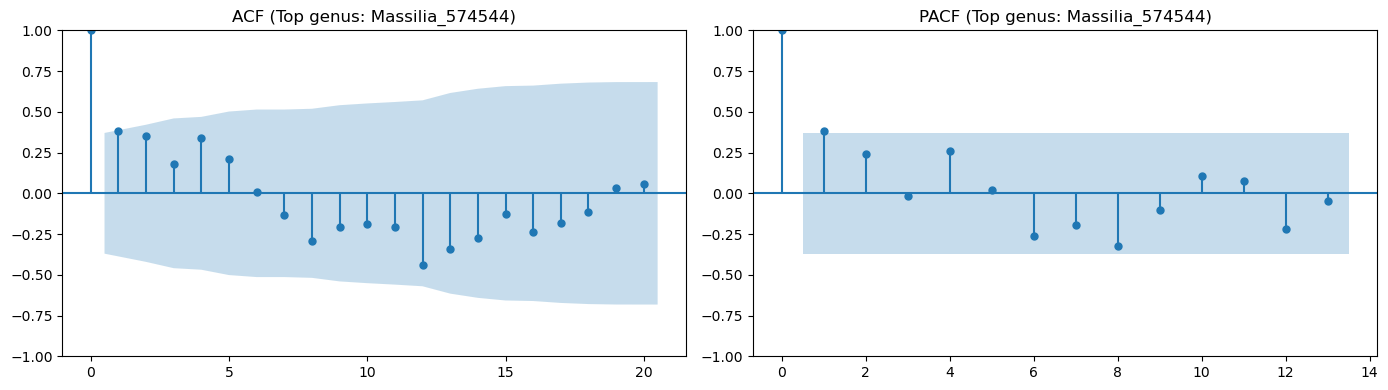

,Sample,sample.type,timepoint_micro,date,time,platename,daysincestart,plantID,Kingdom,Phylum,...,Family,Genus,Species,AbundR100,sampID_micro,Experiment Type,sampID_meta,timepoint_meta,Date and Time,time_idx
0,LIC001,plant,t01,11/1/23,8:00,LIC_01,0,LIC001,d__Bacteria,Actinomycetota,...,Pseudonocardiaceae,Actinomycetospora,Actinomycetospora chiangmaiensis,0.6,LIC001,Long Term,LIC001,t01,2023-11-01 08:00:00,0
1,LIC001,plant,t01,11/1/23,8:00,LIC_01,0,LIC001,d__Bacteria,Actinomycetota,...,Micromonosporaceae,Actinoplanes,Actinoplanes friuliensis,0.6,LIC001,Long Term,LIC001,t01,2023-11-01 08:00:00,0
2,LIC001,plant,t01,11/1/23,8:00,LIC_01,0,LIC001,d__Bacteria,Actinomycetota,...,Micromonosporaceae,Actinoplanes,Couchioplanes caeruleus_372248,0.5,LIC001,Long Term,LIC001,t01,2023-11-01 08:00:00,0
3,LIC001,plant,t01,11/1/23,8:00,LIC_01,0,LIC001,d__Bacteria,Actinomycetota,...,Nocardioidaceae,Aeromicrobium,Aeromicrobium sp001428805,0.8,LIC001,Long Term,LIC001,t01,2023-11-01 08:00:00,0
4,LIC001,plant,t01,11/1/23,8:00,LIC_01,0,LIC001,d__Bacteria,Actinomycetota,...,Geodermatophilaceae,Blastococcus,Blastococcus massiliensis,1.2,LIC001,Long Term,LIC001,t01,2023-11-01 08:00:00,0


In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1) Combine long-term microbiome with long-term metadata
long_term_microbiome_metadata = long_term_microbiome.merge(
    long_term_metadata[["sampID", "timepoint", "Date and Time"]],
    left_on="Sample",
    right_on="sampID",
    how="inner",
    suffixes=("_micro", "_meta"),
)

# Fallback key if Sample does not match metadata sampID
if long_term_microbiome_metadata.empty and "plantID" in long_term_microbiome.columns:
    long_term_microbiome_metadata = long_term_microbiome.merge(
        long_term_metadata[["sampID", "timepoint", "Date and Time"]],
        left_on="plantID",
        right_on="sampID",
        how="inner",
        suffixes=("_micro", "_meta"),
    )

if long_term_microbiome_metadata.empty:
    raise ValueError(
        "No overlapping long-term microbiome and metadata samples were found."
    )

# Resolve merged column names
timepoint_col = (
    "timepoint_meta"
    if "timepoint_meta" in long_term_microbiome_metadata.columns
    else "timepoint"
)
datetime_col = (
    "Date and Time"
    if "Date and Time" in long_term_microbiome_metadata.columns
    else "Date and Time_meta"
)

# 2) Build ordered timepoint index using earliest Date and Time per timepoint
timepoint_order = (
    long_term_microbiome_metadata[[timepoint_col, datetime_col]]
    .dropna()
    .drop_duplicates()
    .sort_values([timepoint_col, datetime_col])
    .groupby(timepoint_col, as_index=False)[datetime_col]
    .min()
    .sort_values(datetime_col)
    .reset_index(drop=True)
)
timepoint_order["time_idx"] = np.arange(len(timepoint_order))

long_term_microbiome_metadata_sorted = (
    long_term_microbiome_metadata.merge(
        timepoint_order[[timepoint_col, "time_idx"]], on=timepoint_col, how="left"
    )
    .sort_values(["time_idx", datetime_col, "Sample", "Genus"], na_position="last")
    .reset_index(drop=True)
)

# 3) Create per-timepoint abundance table by genus
microbiome_by_timepoint = long_term_microbiome_metadata_sorted.groupby(
    ["time_idx", "Genus"], as_index=False
)["AbundR100"].mean()

# Use the overall highest-mean genus as a single time series for ACF/PACF
top_genus = (
    microbiome_by_timepoint.groupby("Genus")["AbundR100"]
    .mean()
    .sort_values(ascending=False)
    .index[0]
)

acf_input_df = (
    microbiome_by_timepoint[microbiome_by_timepoint["Genus"] == top_genus]
    .sort_values("time_idx")
    .dropna(subset=["time_idx", "AbundR100"])
)

acf_series = acf_input_df["AbundR100"]
n_obs = len(acf_series)

if n_obs < 4:
    raise ValueError(
        f"Need at least 4 ordered timepoints for ACF/PACF. Found {n_obs} for genus '{top_genus}'."
    )

acf_lags = min(20, n_obs - 1)
pacf_lags = min(20, max(1, (n_obs // 2) - 1))

# 4) Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(acf_series, lags=acf_lags, ax=axes[0])
axes[0].set_title(f"ACF (Top genus: {top_genus})")

plot_pacf(acf_series, lags=pacf_lags, ax=axes[1], method="ywm")
axes[1].set_title(f"PACF (Top genus: {top_genus})")

plt.tight_layout()
plt.show()

long_term_microbiome_metadata_sorted.head()

In [25]:
# Autocorrelation table (lag 1 and lag 2) for each genus
all_time_idx = np.sort(microbiome_by_timepoint["time_idx"].dropna().unique())


def safe_autocorr(values, lag):
    values = np.asarray(values, dtype=float)
    n = values.size
    if lag >= n or lag < 1:
        return np.nan

    x = values - values.mean()
    denom = np.dot(x, x)
    if np.isclose(denom, 0.0):
        return np.nan

    num = np.dot(x[lag:], x[:-lag])
    return num / denom


records = []
for genus, genus_df in microbiome_by_timepoint.groupby("Genus"):
    genus_series = (
        genus_df.set_index("time_idx")["AbundR100"]
        .reindex(all_time_idx, fill_value=0.0)
        .astype(float)
    )

    # Count only non-zero abundance as present
    n_timepoints_present = int((genus_series > 0).sum())

    records.append(
        {
            "Genus": genus,
            "n_timepoints": n_timepoints_present,
            "acf_lag_1": safe_autocorr(genus_series.values, lag=1),
            "acf_lag_2": safe_autocorr(genus_series.values, lag=2),
        }
    )

genus_autocorr_table = pd.DataFrame(records).sort_values("Genus").reset_index(drop=True)
genus_autocorr_table

,Genus,n_timepoints,acf_lag_1,acf_lag_2
0,Abditibacterium,2,-0.078968,0.447610
1,Actinoallomurus,1,-0.038360,-0.039683
2,Actinocorallia,2,0.458791,-0.043956
3,Actinomycetospora,26,0.019470,0.157865
4,Actinoplanes,26,0.016467,-0.180660
...,...,...,...,...
131,Umezawaea,1,-0.038360,-0.039683
132,Variovorax,28,0.159408,0.218513
133,Virgisporangium,1,-0.038360,-0.039683
134,Williamsia_A,1,-0.038360,-0.039683


In [26]:
genus_autocorr_table["n_timepoints"].unique()

array([ 2,  1, 26, 18, 17,  6,  3, 14,  7, 28,  4, 25,  8, 12, 10,  5, 21,
       22, 15,  9, 23, 20, 16, 13, 27, 24])

In [31]:
genus_autocorr_table.loc[genus_autocorr_table["n_timepoints"] >= 23].sort_values(
    by="acf_lag_1", ascending=False
).head(40)

,Genus,n_timepoints,acf_lag_1,acf_lag_2
78,Microbacterium_A_383321,25,0.608354,0.379001
47,Friedmanniella,28,0.592926,0.524196
86,Neorhizobium_500197,28,0.416391,0.305452
46,Flavobacterium,28,0.397226,0.181645
122,Sphingomonas_L_486704,28,0.381258,0.169295
73,Massilia_574544,28,0.380925,0.352370
36,Chryseobacterium_A_796612,25,0.260087,0.356122
112,Rathayibacter,27,0.249109,-0.085986
66,Kordiimonas,28,0.234294,-0.053104
63,Kineococcus,28,0.223062,-0.108193


In [ ]:
# Circadian Rhythm Sample 1: ACF/PACF plot + lag1/lag2 autocorrelation table by genus
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

circ1_microbiome_metadata = circadian_microbiome_1.merge(
    circadian_metadata_1[["sampID", "timepoint", "Date and Time"]],
    left_on="Sample",
    right_on="sampID",
    how="inner",
    suffixes=("_micro", "_meta"),
)

# Fallback key if needed
if circ1_microbiome_metadata.empty and "plantID" in circadian_microbiome_1.columns:
    circ1_microbiome_metadata = circadian_microbiome_1.merge(
        circadian_metadata_1[["sampID", "timepoint", "Date and Time"]],
        left_on="plantID",
        right_on="sampID",
        how="inner",
        suffixes=("_micro", "_meta"),
    )

if circ1_microbiome_metadata.empty:
    raise ValueError("No overlapping samples found for Circadian Rhythm Sample 1.")

circ1_timepoint_col = (
    "timepoint_meta"
    if "timepoint_meta" in circ1_microbiome_metadata.columns
    else "timepoint"
)
circ1_datetime_col = (
    "Date and Time"
    if "Date and Time" in circ1_microbiome_metadata.columns
    else "Date and Time_meta"
)

# Build ordered time index
circ1_timepoint_order = (
    circ1_microbiome_metadata[[circ1_timepoint_col, circ1_datetime_col]]
    .dropna()
    .drop_duplicates()
    .sort_values([circ1_timepoint_col, circ1_datetime_col])
    .groupby(circ1_timepoint_col, as_index=False)[circ1_datetime_col]
    .min()
    .sort_values(circ1_datetime_col)
    .reset_index(drop=True)
)
circ1_timepoint_order["time_idx"] = np.arange(len(circ1_timepoint_order))

circ1_microbiome_sorted = (
    circ1_microbiome_metadata.merge(
        circ1_timepoint_order[[circ1_timepoint_col, "time_idx"]],
        on=circ1_timepoint_col,
        how="left",
    )
    .sort_values(
        ["time_idx", circ1_datetime_col, "Sample", "Genus"], na_position="last"
    )
    .reset_index(drop=True)
)

circ1_microbiome_by_timepoint = circ1_microbiome_sorted.groupby(
    ["time_idx", "Genus"], as_index=False
)["AbundR100"].mean()

# ACF/PACF plot for top-mean genus
circ1_top_genus = (
    circ1_microbiome_by_timepoint.groupby("Genus")["AbundR100"]
    .mean()
    .sort_values(ascending=False)
    .index[0]
)

circ1_acf_input_df = (
    circ1_microbiome_by_timepoint[
        circ1_microbiome_by_timepoint["Genus"] == circ1_top_genus
    ]
    .sort_values("time_idx")
    .dropna(subset=["time_idx", "AbundR100"])
)
circ1_acf_series = circ1_acf_input_df["AbundR100"]
circ1_n_obs = len(circ1_acf_series)

if circ1_n_obs < 4:
    raise ValueError(
        f"Need at least 4 ordered timepoints for ACF/PACF. Found {circ1_n_obs} for genus '{circ1_top_genus}'."
    )

circ1_acf_lags = min(20, circ1_n_obs - 1)
circ1_pacf_lags = min(20, max(1, (circ1_n_obs // 2) - 1))

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(circ1_acf_series, lags=circ1_acf_lags, ax=axes[0])
axes[0].set_title(f"Circadian 1 ACF (Top genus: {circ1_top_genus})")
plot_pacf(circ1_acf_series, lags=circ1_pacf_lags, ax=axes[1], method="ywm")
axes[1].set_title(f"Circadian 1 PACF (Top genus: {circ1_top_genus})")
plt.tight_layout()
plt.show()

# Lag 1 / Lag 2 autocorrelation table for each genus
circ1_all_time_idx = np.sort(
    circ1_microbiome_by_timepoint["time_idx"].dropna().unique()
)


def safe_autocorr(values, lag):
    values = np.asarray(values, dtype=float)
    n = values.size
    if lag >= n or lag < 1:
        return np.nan
    x = values - values.mean()
    denom = np.dot(x, x)
    if np.isclose(denom, 0.0):
        return np.nan
    num = np.dot(x[lag:], x[:-lag])
    return num / denom


circ1_records = []
for genus, genus_df in circ1_microbiome_by_timepoint.groupby("Genus"):
    genus_series = (
        genus_df.set_index("time_idx")["AbundR100"]
        .reindex(circ1_all_time_idx, fill_value=0.0)
        .astype(float)
    )
    n_timepoints_present = int((genus_series > 0).sum())

    circ1_records.append(
        {
            "Genus": genus,
            "n_timepoints": n_timepoints_present,
            "acf_lag_1": safe_autocorr(genus_series.values, lag=1),
            "acf_lag_2": safe_autocorr(genus_series.values, lag=2),
        }
    )

circadian1_genus_autocorr_table = (
    pd.DataFrame(circ1_records).sort_values("Genus").reset_index(drop=True)
)
circadian1_genus_autocorr_table